In [4]:
from google.colab import drive
drive.mount('/content/drive')
# https://github.com/DiegoLoy0/TalentoTech

Mounted at /content/drive


**Cargando la base de datos y realizando copia para trabajar con esta.**

In [5]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataFrame/epl_final.csv')

In [6]:
df_premier = df.copy()

# ⚽ Visualización de la base de datos.

In [7]:
df_premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


Se puede verque contamos con 21 columnas, con 17 tipo númerico y las demás tipo object. Estos son los datos que tenemos para cada partido dividiendolos por Local y Visitante.

# 🧹Limpieza de datos

Para empezar con la limpieza, se realiza un analisis de los datos en el DataSet identificando así:


*   Valores nulos.
*   Valores faltantes.
*   Creacion de columnas (que nos brinden una manipulacion más efectiva de los datos).
*   Tranformacion de tipos de datos. (De igual forma para la manipulacion de datos).

In [8]:
# Asegurarnos de que MatchDate sea de tipo datetime
df_premier['MatchDate'] = pd.to_datetime(df_premier['MatchDate'], dayfirst=True, errors='coerce')

# Crear columnas nuevas con año, mes y día
df_premier['match_year'] = df_premier['MatchDate'].dt.year
df_premier['match_month'] = df_premier['MatchDate'].dt.month
df_premier['match_day'] = df_premier['MatchDate'].dt.day

# Eliminar la columna original
df.drop('MatchDate', axis=1, inplace=True)

# Verificamos el resultado
print(df_premier[['MatchDate', 'match_year', 'match_month', 'match_day']].head())

   MatchDate  match_year  match_month  match_day
0 2000-08-19        2000            8         19
1 2000-08-19        2000            8         19
2 2000-08-19        2000            8         19
3 2000-08-19        2000            8         19
4 2000-08-19        2000            8         19


/tmp/ipython-input-8-3042771523.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_premier['MatchDate'] = pd.to_datetime(df_premier['MatchDate'], dayfirst=True, errors='coerce')


información sobre datos nulos, a nuestro favor contamos que al ser datos reales y oficiales, no tienen valores nulos.

In [9]:
print(df_premier.isnull().sum())

Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
match_year           0
match_month          0
match_day            0
dtype: int64


In [10]:
df_premier.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards', 'match_year', 'match_month',
       'match_day'],
      dtype='object')

Adicción de columnas al DF (data frame) en valores númericos, permitiendo ingresar estas columnas al modelo de predicción. Y asignando un identificador a cada equipo.

In [11]:
# 1. Obtener todos los equipos únicos desde HomeTeam y AwayTeam
equipos_unicos = pd.unique(df_premier[['HomeTeam', 'AwayTeam']].values.ravel())

# 2. Crear diccionario de mapeo equipo → ID
equipo_id_map = {equipo: idx for idx, equipo in enumerate(sorted(equipos_unicos))}

# 3. Crear DataFrame separado con los equipos y sus IDs
equipos_df = pd.DataFrame({
    'Equipo': list(equipo_id_map.keys()),
    'EquipoID': list(equipo_id_map.values())
})

# 4. Agregar columnas con los IDs al DataFrame principal
df_premier['HomeTeamID'] = df_premier['HomeTeam'].map(equipo_id_map)
df_premier['AwayTeamID'] = df_premier['AwayTeam'].map(equipo_id_map)

# 5. (Opcional) Eliminar los nombres de equipos originales si ya no los necesitas
df_premier.drop(['HomeTeam', 'AwayTeam'], axis=1, inplace=True)

# 6. Verificación
print(df_premier[['HomeTeamID', 'AwayTeamID']].head())
print(equipos_df.head())

   HomeTeamID  AwayTeamID
0          12          26
1          13          43
2          14          28
3          16          36
4          22          17
        Equipo  EquipoID
0      Arsenal         0
1  Aston Villa         1
2   Birmingham         2
3    Blackburn         3
4    Blackpool         4


De igual forma se realiza un mapeo a las columnas de resultado y medio tiempo. Pero estas si, se trabajaran en la mismas columnas.

In [12]:
# Mapeo de resultados
resultado_map = {'D': 0, 'H': 1, 'A': 2}

# Convertir directamente en las columnas existentes
df_premier['FullTimeResult'] = df_premier['FullTimeResult'].map(resultado_map)
df_premier['HalfTimeResult'] = df_premier['HalfTimeResult'].map(resultado_map)

In [13]:
df_premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Season             9380 non-null   object        
 1   MatchDate          9380 non-null   datetime64[ns]
 2   FullTimeHomeGoals  9380 non-null   int64         
 3   FullTimeAwayGoals  9380 non-null   int64         
 4   FullTimeResult     9380 non-null   int64         
 5   HalfTimeHomeGoals  9380 non-null   int64         
 6   HalfTimeAwayGoals  9380 non-null   int64         
 7   HalfTimeResult     9380 non-null   int64         
 8   HomeShots          9380 non-null   int64         
 9   AwayShots          9380 non-null   int64         
 10  HomeShotsOnTarget  9380 non-null   int64         
 11  AwayShotsOnTarget  9380 non-null   int64         
 12  HomeCorners        9380 non-null   int64         
 13  AwayCorners        9380 non-null   int64         
 14  HomeFoul

Creamos un vector para almacenar las estadisticas de los promedios que necesitamos para la predicción.

In [14]:
estadisticas = []

for equipo_id in df_premier['HomeTeamID'].unique():
    # Partidos como local
    df_local = df_premier[df_premier['HomeTeamID'] == equipo_id]
    goles_favor_local = df_local['FullTimeHomeGoals'].mean()
    goles_contra_local = df_local['FullTimeAwayGoals'].mean()
    corners_local = df_local['HomeCorners'].mean()
    tiros_local = df_local['HomeShots'].sum()
    tiros_arco_local = df_local['HomeShotsOnTarget'].sum()
    precision_local = tiros_arco_local / tiros_local if tiros_local > 0 else 0
    victorias_local = (df_local['FullTimeResult'] == 1).mean()
    derrotas_local = (df_local['FullTimeResult'] == 2).mean()
    amarillas_local = df_local['HomeYellowCards'].mean()
    rojas_local = df_local['HomeRedCards'].mean()

    # Partidos como visitante
    df_visit = df_premier[df_premier['AwayTeamID'] == equipo_id]
    goles_favor_visit = df_visit['FullTimeAwayGoals'].mean()
    goles_contra_visit = df_visit['FullTimeHomeGoals'].mean()
    corners_visit = df_visit['AwayCorners'].mean()
    tiros_visit = df_visit['AwayShots'].sum()
    tiros_arco_visit = df_visit['AwayShotsOnTarget'].sum()
    precision_visit = tiros_arco_visit / tiros_visit if tiros_visit > 0 else 0
    victorias_visit = (df_visit['FullTimeResult'] == 2).mean()
    derrotas_visit = (df_visit['FullTimeResult'] == 1).mean()
    amarillas_visit = df_visit['AwayYellowCards'].mean()
    rojas_visit = df_visit['AwayRedCards'].mean()

    # Combinar promedios
    estadisticas.append({
        'EquipoID': equipo_id,
        'prom_goles_favor': (goles_favor_local + goles_favor_visit) / 2,
        'prom_goles_contra': (goles_contra_local + goles_contra_visit) / 2,
        'prom_corners': (corners_local + corners_visit) / 2,
        'precision_tiros': (precision_local + precision_visit) / 2,
        'prom_victorias': (victorias_local + victorias_visit) / 2,
        'prom_derrotas': (derrotas_local + derrotas_visit) / 2,
        'prom_amarillas': (amarillas_local + amarillas_visit) / 2,
        'prom_rojas': (rojas_local + rojas_visit) / 2
    })

# Convertir a DataFrame
df_stats_equipos = pd.DataFrame(estadisticas)

# Verificar resultado
print(df_stats_equipos.head())

   EquipoID  prom_goles_favor  prom_goles_contra  prom_corners  \
0        12          1.141166           1.452464      5.069291   
1        13          1.815109           0.962764      6.156284   
2        14          0.947368           1.657895      5.421053   
3        16          0.789474           1.850877      4.184211   
4        22          1.383001           1.598209      5.491544   

   precision_tiros  prom_victorias  prom_derrotas  prom_amarillas  prom_rojas  
0         0.523350        0.322416       0.418089        1.290024    0.077644  
1         0.444567        0.568763       0.201786        1.683271    0.072588  
2         0.455959        0.210526       0.526316        2.000000    0.105263  
3         0.497276        0.166667       0.605263        1.850877    0.052632  
4         0.424894        0.352437       0.421697        2.012184    0.080564  


Con estas columnas listas de promedios, procedemos a renombrar las columnas, dividiendolas en equipo local y equipo visitante.

In [15]:
# Renombramos columnas del local para diferenciarlas
df_stats_local = df_stats_equipos.rename(columns={
    'EquipoID': 'HomeTeamID',
    'prom_goles_favor': 'local_goles_favor',
    'prom_goles_contra': 'local_goles_contra',
    'prom_corners': 'local_corners',
    'precision_tiros': 'local_precision_tiros',
    'prom_victorias': 'local_victorias',
    'prom_derrotas': 'local_derrotas',
    'prom_amarillas': 'local_amarillas',
    'prom_rojas': 'local_rojas'
})

# Igual para visitante
df_stats_visit = df_stats_equipos.rename(columns={
    'EquipoID': 'AwayTeamID',
    'prom_goles_favor': 'visit_goles_favor',
    'prom_goles_contra': 'visit_goles_contra',
    'prom_corners': 'visit_corners',
    'precision_tiros': 'visit_precision_tiros',
    'prom_victorias': 'visit_victorias',
    'prom_derrotas': 'visit_derrotas',
    'prom_amarillas': 'visit_amarillas',
    'prom_rojas': 'visit_rojas'
})

# Hacemos merge para agregar estadísticas del equipo local
df_premier = df_premier.merge(df_stats_local, on='HomeTeamID', how='left')

# Hacemos merge para agregar estadísticas del equipo visitante
df_premier = df_premier.merge(df_stats_visit, on='AwayTeamID', how='left')

# Verificamos columnas agregadas
df_premier.head()

,Season,MatchDate,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,...,local_amarillas,local_rojas,visit_goles_favor,visit_goles_contra,visit_corners,visit_precision_tiros,visit_victorias,visit_derrotas,visit_amarillas,visit_rojas
0,2000/01,2000-08-19,4,0,1,2,0,1,17,8,...,1.290024,0.077644,1.910000,1.050000,6.576667,0.439792,0.555556,0.255556,1.514444,0.074444
1,2000/01,2000-08-19,4,2,1,1,0,1,17,12,...,1.683271,0.072588,1.260293,1.498397,5.101437,0.411852,0.326433,0.423870,1.684413,0.070859
2,2000/01,2000-08-19,1,3,2,1,1,0,6,16,...,2.000000,0.105263,1.082165,1.331161,4.780171,0.495937,0.279115,0.433343,1.624628,0.086140
3,2000/01,2000-08-19,2,2,0,1,2,2,6,13,...,1.850877,0.052632,1.165104,1.478376,5.279984,0.391018,0.293179,0.437147,1.508469,0.069342
4,2000/01,2000-08-19,2,0,1,2,0,1,17,12,...,2.012184,0.080564,1.280464,1.269316,5.363853,0.443218,0.370563,0.351075,1.614575,0.084255


# Gráficos de promedios

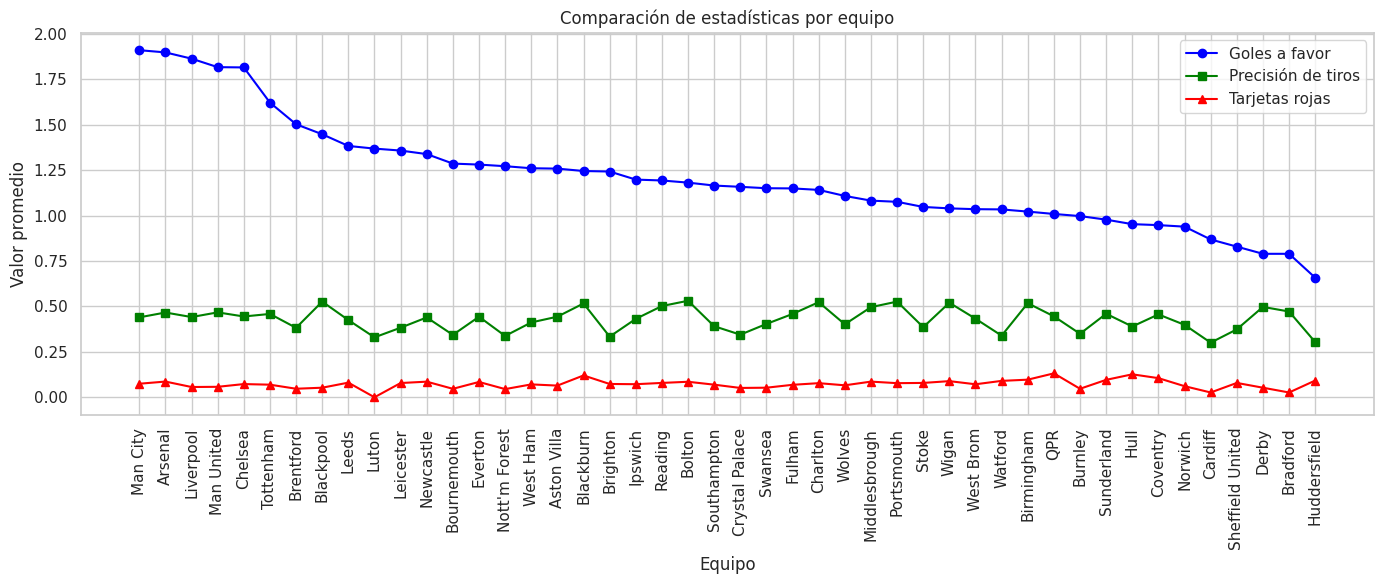

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unimos nombres de equipos al df_stats_equipos para mejor visualización
df_graficas = df_stats_equipos.merge(equipos_df, on='EquipoID')

# Ordenamos por goles a favor para tener una gráfica clara
df_graficas = df_graficas.sort_values(by='prom_goles_favor', ascending=False)

# Estilo de los gráficos
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

# 1. Goles a favor
plt.plot(df_graficas['Equipo'], df_graficas['prom_goles_favor'], label='Goles a favor', marker='o', color='blue')

# 2. Precisión de tiros
plt.plot(df_graficas['Equipo'], df_graficas['precision_tiros'], label='Precisión de tiros', marker='s', color='green')

# 3. Tarjetas rojas
plt.plot(df_graficas['Equipo'], df_graficas['prom_rojas'], label='Tarjetas rojas', marker='^', color='red')

# Estética del gráfico
plt.xticks(rotation=90)
plt.title('Comparación de estadísticas por equipo')
plt.ylabel('Valor promedio')
plt.xlabel('Equipo')
plt.legend()
plt.tight_layout()
plt.show()


Voy a sugerir estas tres porque son muy representativas y fáciles de interpretar visualmente:

Promedio de goles a favor (prom_goles_favor)
→ Muestra el poder ofensivo del equipo.

Precisión de tiros al arco (precision_tiros)
→ Mide qué tan eficaces son los disparos (calidad de ataque).

Promedio de tarjetas rojas (prom_rojas)
→ Refleja el juego agresivo o indisciplina.

Estas tres métricas nos dan un panorama: ofensiva, eficacia y disciplina.

In [17]:
df_premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Season                 9380 non-null   object        
 1   MatchDate              9380 non-null   datetime64[ns]
 2   FullTimeHomeGoals      9380 non-null   int64         
 3   FullTimeAwayGoals      9380 non-null   int64         
 4   FullTimeResult         9380 non-null   int64         
 5   HalfTimeHomeGoals      9380 non-null   int64         
 6   HalfTimeAwayGoals      9380 non-null   int64         
 7   HalfTimeResult         9380 non-null   int64         
 8   HomeShots              9380 non-null   int64         
 9   AwayShots              9380 non-null   int64         
 10  HomeShotsOnTarget      9380 non-null   int64         
 11  AwayShotsOnTarget      9380 non-null   int64         
 12  HomeCorners            9380 non-null   int64         
 13  Awa

In [18]:
# Eliminar columnas duplicadas con sufijo "_y"
df_premier = df_premier.drop(columns=[col for col in df_premier.columns if col.endswith('_y')])

A continuación, se define el target (valor que se quiere predecir), las columnas que necesitaremos y los valores de X y Y, para crear el modelo mas adelante y enternarlo.

In [19]:
# Definir target
y = df_premier['FullTimeResult']

columnas_features = [
    'match_year', 'match_month', 'match_day', 'HomeTeamID', 'AwayTeamID',
    'local_goles_favor', 'local_goles_contra', 'local_corners', 'local_precision_tiros',
    'local_victorias', 'local_derrotas', 'local_amarillas', 'local_rojas',
    'visit_goles_favor', 'visit_goles_contra', 'visit_corners', 'visit_precision_tiros',
    'visit_victorias', 'visit_derrotas', 'visit_amarillas', 'visit_rojas'
]

X = df_premier[columnas_features]
y = df_premier['FullTimeResult']


# Verificación
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (9380, 21)
Shape de y: (9380,)


Verificacion de los valores, para que esten en el tipo apropiado.

In [20]:
print(X.dtypes)

match_year                 int32
match_month                int32
match_day                  int32
HomeTeamID                 int64
AwayTeamID                 int64
local_goles_favor        float64
local_goles_contra       float64
local_corners            float64
local_precision_tiros    float64
local_victorias          float64
local_derrotas           float64
local_amarillas          float64
local_rojas              float64
visit_goles_favor        float64
visit_goles_contra       float64
visit_corners            float64
visit_precision_tiros    float64
visit_victorias          float64
visit_derrotas           float64
visit_amarillas          float64
visit_rojas              float64
dtype: object


# Creacion del modelo.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo_rf.fit(X_train, y_train)

# Evaluación
y_pred = modelo_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.4632196162046908

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.31      0.22      0.25       474
           1       0.55      0.62      0.58       863
           2       0.41      0.43      0.42       539

    accuracy                           0.46      1876
   macro avg       0.42      0.42      0.42      1876
weighted avg       0.45      0.46      0.45      1876



Validación de porcentajes sobre los resultado y vereificación

In [22]:
# Frecuencia de clases en el target
print(y.value_counts(normalize=True))  # Proporciones

FullTimeResult
1    0.458316
2    0.295096
0    0.246588
Name: proportion, dtype: float64


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.22      0.25       474
           1       0.55      0.62      0.58       863
           2       0.41      0.43      0.42       539

    accuracy                           0.46      1876
   macro avg       0.42      0.42      0.42      1876
weighted avg       0.45      0.46      0.45      1876



Nuevo modelo realista

In [24]:
# Convertir 'Season' de '2021/22' a columnas numéricas
df_premier[['season_start', 'season_end']] = df_premier['Season'].str.split('/', expand=True)
df_premier['season_start'] = df_premier['season_start'].astype(int)
df_premier['season_end'] = df_premier['season_start'].astype(str).str[:3] + df_premier['season_end']
df_premier['season_end'] = df_premier['season_end'].astype(int)

# Crear columna final opcional (puedes usar la de inicio para el modelo)
df_premier['season_numeric'] = df_premier['season_start']

In [25]:
# Lista de columnas válidas para predecir (disponibles antes del partido)
columnas_validas = [
    'season_numeric',

    'match_year', 'match_month', 'match_day',
    'HomeTeamID', 'AwayTeamID',

    'local_goles_favor', 'local_goles_contra', 'local_corners',
    'local_precision_tiros', 'local_victorias', 'local_derrotas',
    'local_amarillas', 'local_rojas',

    'visit_goles_favor', 'visit_goles_contra', 'visit_corners',
    'visit_precision_tiros', 'visit_victorias', 'visit_derrotas',
    'visit_amarillas', 'visit_rojas'
]

# Dataset final para el modelo
X_real = df_premier[columnas_validas]
y_real = df_premier['FullTimeResult']


In [26]:
print(df_premier.columns.tolist())


['Season', 'MatchDate', 'FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards', 'match_year', 'match_month', 'match_day', 'HomeTeamID', 'AwayTeamID', 'local_goles_favor', 'local_goles_contra', 'local_corners', 'local_precision_tiros', 'local_victorias', 'local_derrotas', 'local_amarillas', 'local_rojas', 'visit_goles_favor', 'visit_goles_contra', 'visit_corners', 'visit_precision_tiros', 'visit_victorias', 'visit_derrotas', 'visit_amarillas', 'visit_rojas', 'season_start', 'season_end', 'season_numeric']


In [27]:
# Mapeo de nombres estadísticos base a nombres esperados por el modelo
mapa_columnas = {
    'prom_goles_favor': 'goles_favor_x',
    'prom_goles_contra': 'goles_contra_x',
    'prom_corners': 'corners_x',
    'precision_tiros': 'precision_tiros_x',
    'prom_victorias': 'victorias_x',
    'prom_derrotas': 'derrotas_x',
    'prom_amarillas': 'amarillas_x',
    'prom_rojas': 'rojas_x'
}

def renombrar_columnas(stats_df, prefijo):
    # stats_df: dataframe con columnas base como prom_goles_favor, etc.
    # prefijo: 'local' o 'visit'
    nueva_cols = ['EquipoID']
    for col in stats_df.columns:
        if col == 'EquipoID':
            continue
        if col in mapa_columnas:
            nueva_cols.append(f"{prefijo}_{mapa_columnas[col]}")
        else:
            nueva_cols.append(col)
    stats_df.columns = nueva_cols
    return stats_df


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# División
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Entrenar modelo con balance de clases
modelo_rf_real = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo_rf_real.fit(X_train, y_train)

# Evaluar
y_pred = modelo_rf_real.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.46588486140724944

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.28      0.20      0.23       474
           1       0.55      0.64      0.59       863
           2       0.42      0.42      0.42       539

    accuracy                           0.47      1876
   macro avg       0.42      0.42      0.42      1876
weighted avg       0.45      0.47      0.45      1876



In [29]:
print("Columnas de df_stats_equipos:")
print(df_stats_equipos.columns.tolist())
print(df_stats_equipos.head())

print("\nColumnas de df_premier:")
print(df_premier.columns.tolist())
print(df_premier.head())

Columnas de df_stats_equipos:
['EquipoID', 'prom_goles_favor', 'prom_goles_contra', 'prom_corners', 'precision_tiros', 'prom_victorias', 'prom_derrotas', 'prom_amarillas', 'prom_rojas']
   EquipoID  prom_goles_favor  prom_goles_contra  prom_corners  \
0        12          1.141166           1.452464      5.069291   
1        13          1.815109           0.962764      6.156284   
2        14          0.947368           1.657895      5.421053   
3        16          0.789474           1.850877      4.184211   
4        22          1.383001           1.598209      5.491544   

   precision_tiros  prom_victorias  prom_derrotas  prom_amarillas  prom_rojas  
0         0.523350        0.322416       0.418089        1.290024    0.077644  
1         0.444567        0.568763       0.201786        1.683271    0.072588  
2         0.455959        0.210526       0.526316        2.000000    0.105263  
3         0.497276        0.166667       0.605263        1.850877    0.052632  
4         0.42489

In [30]:
print("Columnas usadas en X_real:")
print(X_real.columns.tolist())

Columnas usadas en X_real:
['season_numeric', 'match_year', 'match_month', 'match_day', 'HomeTeamID', 'AwayTeamID', 'local_goles_favor', 'local_goles_contra', 'local_corners', 'local_precision_tiros', 'local_victorias', 'local_derrotas', 'local_amarillas', 'local_rojas', 'visit_goles_favor', 'visit_goles_contra', 'visit_corners', 'visit_precision_tiros', 'visit_victorias', 'visit_derrotas', 'visit_amarillas', 'visit_rojas']


Funcion de prediccion

In [31]:
def crear_df_prediccion(nombre_local, nombre_visitante, equipos_df, df_stats_equipos, X_columns):
    import pandas as pd

    # Obtener IDs de los equipos
    try:
        id_local = equipos_df.loc[equipos_df['Equipo'] == nombre_local, 'EquipoID'].values[0]
        id_visit = equipos_df.loc[equipos_df['Equipo'] == nombre_visitante, 'EquipoID'].values[0]
    except IndexError:
        raise ValueError("Uno de los equipos no fue encontrado.")

    # Estadísticas base para local y visitante
    stats_local = df_stats_equipos[df_stats_equipos['EquipoID'] == id_local].copy()
    stats_visit = df_stats_equipos[df_stats_equipos['EquipoID'] == id_visit].copy()

    # Mapeo base -> columnas usadas en modelo (sin prefijo)
    mapa_columnas = {
        'prom_goles_favor': 'goles_favor',
        'prom_goles_contra': 'goles_contra',
        'prom_corners': 'corners',
        'precision_tiros': 'precision_tiros',
        'prom_victorias': 'victorias',
        'prom_derrotas': 'derrotas',
        'prom_amarillas': 'amarillas',
        'prom_rojas': 'rojas'
    }

    def renombrar_cols(stats_df, prefijo):
        nueva_cols = ['EquipoID']
        for col in stats_df.columns:
            if col == 'EquipoID':
                continue
            if col in mapa_columnas:
                nueva_cols.append(f"{prefijo}_{mapa_columnas[col]}")
            else:
                nueva_cols.append(col)
        stats_df.columns = nueva_cols
        return stats_df

    stats_local = renombrar_cols(stats_local, 'local')
    stats_visit = renombrar_cols(stats_visit, 'visit')

    # Crear DataFrame base para el partido con datos ficticios o reales según corresponda
    datos_partido = {
        'season_numeric': [20250],  # Ajusta este valor según tu dataset
        'match_year': [2025],
        'match_month': [8],
        'match_day': [15],
        'HomeTeamID': [id_local],
        'AwayTeamID': [id_visit]
    }
    df_pred = pd.DataFrame(datos_partido)

    # Unir las estadísticas locales y visitantes
    df_pred = df_pred.merge(stats_local, left_on='HomeTeamID', right_on='EquipoID', how='left')
    df_pred = df_pred.merge(stats_visit, left_on='AwayTeamID', right_on='EquipoID', how='left')
    df_pred.drop(columns=['EquipoID_x', 'EquipoID_y'], inplace=True)

    # Reordenar columnas para que coincidan con el modelo
    df_pred = df_pred.reindex(columns=X_columns)

    # Validar que no falten columnas
    faltantes = set(X_columns) - set(df_pred.columns)
    if len(faltantes) > 0:
        raise ValueError(f"Faltan columnas en el DataFrame de predicción: {faltantes}")

    return df_pred

Ingreso de valores a la función para la ejecución

In [32]:
def predecir_resultado_partido(nombre_local, nombre_visitante):
    try:
        df_pred = crear_df_prediccion(nombre_local, nombre_visitante, equipos_df, df_stats_equipos, X_real.columns)
    except ValueError as e:
        return f"Error: {e}"

    pred = modelo_rf_real.predict(df_pred)[0]
    resultado = {0: 'Empate', 1: 'Gana Local', 2: 'Gana Visitante'}
    return f"Resultado predicho: {resultado[pred]}"

In [33]:
import ipywidgets as widgets
from IPython.display import display

def predecir_resultado_interactivo():
    equipos = sorted(equipos_df['Equipo'].unique())

    # Crear dropdowns para seleccionar equipos
    dropdown_local = widgets.Dropdown(
        options=equipos,
        description='Local:',
        disabled=False,
    )

    dropdown_visitante = widgets.Dropdown(
        options=equipos,
        description='Visitante:',
        disabled=False,
    )

    button = widgets.Button(description="Predecir Resultado")

    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            output.clear_output()
            nombre_local = dropdown_local.value
            nombre_visitante = dropdown_visitante.value
            resultado = predecir_resultado_partido(nombre_local, nombre_visitante)
            print(resultado)

    button.on_click(on_button_clicked)

    display(dropdown_local, dropdown_visitante, button, output)

# *Ingreso funciónal*

In [34]:
predecir_resultado_interactivo()

Dropdown(description='Local:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bol…

Dropdown(description='Visitante:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', …

Button(description='Predecir Resultado', style=ButtonStyle())

Output()

# Grafica basada en predicción

Se realiza una grafica, utilizando el modelo de prediccion anterior, en la cual utlizamos un equipo de nuestros datos (Liverpool) para obtener una prediccion de goles en los proximos 10 años.

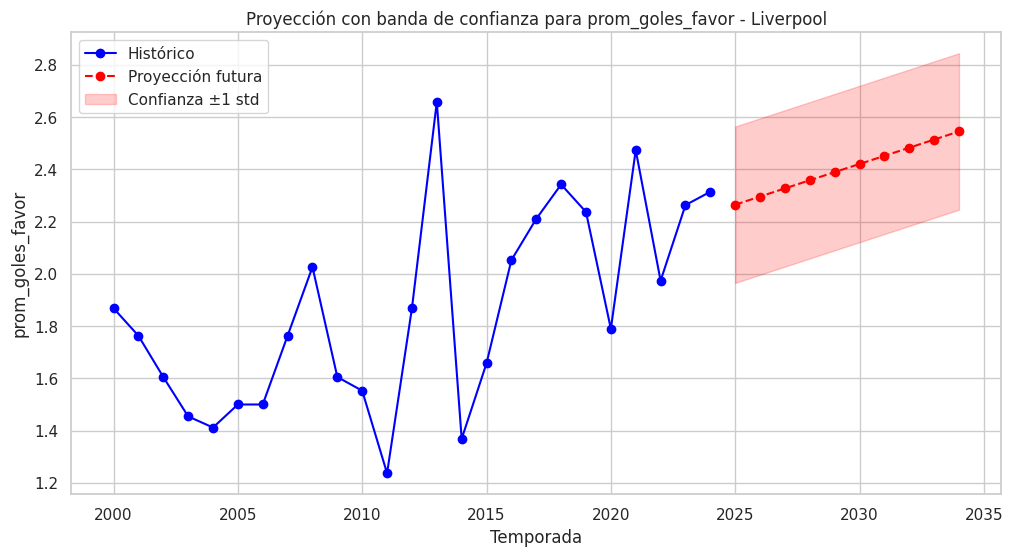

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def grafico_con_sombreado(df, equipo_nombre, metric='prom_goles_favor', periodo='season_numeric', años_futuro=10):
    id_equipo = equipos_df[equipos_df['Equipo'] == equipo_nombre]['EquipoID'].values[0]

    # Filtrar datos históricos para el equipo (ejemplo para goles a favor)
    partidos_local = df[df['HomeTeamID'] == id_equipo].copy()
    partidos_local['metric'] = partidos_local['FullTimeHomeGoals'] if metric == 'prom_goles_favor' else None

    partidos_visit = df[df['AwayTeamID'] == id_equipo].copy()
    partidos_visit['metric'] = partidos_visit['FullTimeAwayGoals'] if metric == 'prom_goles_favor' else None

    partidos = pd.concat([partidos_local, partidos_visit])

    resumen = partidos.groupby(periodo)['metric'].mean().reset_index().dropna()

    X = resumen[periodo].values.reshape(-1, 1)
    y = resumen['metric'].values

    model = LinearRegression()
    model.fit(X, y)

    # Predicción futura
    futuro_x = np.array([resumen[periodo].max() + i for i in range(1, años_futuro + 1)]).reshape(-1, 1)
    futuro_y = model.predict(futuro_x)

    # Para sombreado simple: calcular residual std para banda ±1 std
    residuals = y - model.predict(X)
    std_res = np.std(residuals)

    plt.figure(figsize=(12,6))
    plt.plot(resumen[periodo], y, 'o-', label='Histórico', color='blue')
    plt.plot(futuro_x, futuro_y, 'o--', label='Proyección futura', color='red')
    plt.fill_between(futuro_x.flatten(), futuro_y - std_res, futuro_y + std_res, color='red', alpha=0.2, label='Confianza ±1 std')

    plt.title(f'Proyección con banda de confianza para {metric} - {equipo_nombre}')
    plt.xlabel('Temporada')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

grafico_con_sombreado(df_premier, 'Liverpool', metric='prom_goles_favor', periodo='season_numeric', años_futuro=10)

# Modelo de regresión logistica

In [36]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de regresión logística
modelo_lr_real = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)
modelo_lr_real.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [37]:
def predecir_resultado_partido_lr(nombre_local, nombre_visitante):
    try:
        df_pred = crear_df_prediccion(nombre_local, nombre_visitante, equipos_df, df_stats_equipos, X_real.columns)
    except ValueError as e:
        return f"Error: {e}"

    pred = modelo_lr_real.predict(df_pred)[0]
    resultado = {0: 'Empate', 1: 'Gana Local', 2: 'Gana Visitante'}
    return f"Resultado predicho (Regresión Logística): {resultado[pred]}"

In [38]:
def predecir_resultado_interactivo_modelos():
    equipos = sorted(equipos_df['Equipo'].unique())

    dropdown_local = widgets.Dropdown(options=equipos, description='Local:')
    dropdown_visitante = widgets.Dropdown(options=equipos, description='Visitante:')
    dropdown_modelo = widgets.Dropdown(options=['Random Forest', 'Regresión Logística'], description='Modelo:')
    button = widgets.Button(description="Predecir Resultado")
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            output.clear_output()
            local = dropdown_local.value
            visitante = dropdown_visitante.value
            modelo = dropdown_modelo.value

            if modelo == 'Random Forest':
                resultado = predecir_resultado_partido(local, visitante)
            else:
                resultado = predecir_resultado_partido_lr(local, visitante)

            print(resultado)

    button.on_click(on_button_clicked)
    display(dropdown_local, dropdown_visitante, dropdown_modelo, button, output)

In [39]:
predecir_resultado_interactivo_modelos()

Dropdown(description='Local:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bol…

Dropdown(description='Visitante:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', …

Dropdown(description='Modelo:', options=('Random Forest', 'Regresión Logística'), value='Random Forest')

Button(description='Predecir Resultado', style=ButtonStyle())

Output()

In [42]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción sobre test set
y_pred = modelo_lr_real.predict(X_test)

# Métricas principales
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Puedes usar 'macro', 'micro', o 'weighted'

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))
plt.show()

Accuracy: 0.4957
F1 Score (weighted): 0.4868

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       474
           1       0.62      0.56      0.59       863
           2       0.44      0.63      0.52       539

    accuracy                           0.50      1876
   macro avg       0.46      0.47      0.46      1876
weighted avg       0.49      0.50      0.49      1876



# Modelo XGBoost


In [62]:
!pip install xgboost ipywidgets scikit-learn pandas

In [71]:
# Importar las bibliotecas necesarias
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Asegúrate de que estas columnas estén bien definidas en tu dataframe ---
columnas_features = [
    'match_year', 'match_month', 'match_day', 'HomeTeamID', 'AwayTeamID',
    'local_goles_favor', 'local_goles_contra', 'local_corners', 'local_precision_tiros',
    'local_victorias', 'local_derrotas', 'local_amarillas', 'local_rojas',
    'visit_goles_favor', 'visit_goles_contra', 'visit_corners', 'visit_precision_tiros',
    'visit_victorias', 'visit_derrotas', 'visit_amarillas', 'visit_rojas'
]

# Definir target
y = df_premier['FullTimeResult']
X = df_premier[columnas_features]

# --- Escalar los datos para la Regresión Logística ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Dividir los datos en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Entrenar los modelos ---
# Modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Modelo XGBoost
modelo_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
modelo_xgb.fit(X_train, y_train)

# Modelo Regresión Logística
modelo_lr = LogisticRegression(max_iter=10000, multi_class='ovr', solver='lbfgs')
modelo_lr.fit(X_train, y_train)

# --- Función para crear el DataFrame de predicción ---
def crear_df_prediccion(nombre_local, nombre_visitante, equipos_df, df_stats_equipos, X_columns):
    import pandas as pd

    # Obtener IDs de los equipos
    try:
        id_local = equipos_df.loc[equipos_df['Equipo'] == nombre_local, 'EquipoID'].values[0]
        id_visit = equipos_df.loc[equipos_df['Equipo'] == nombre_visitante, 'EquipoID'].values[0]
    except IndexError:
        raise ValueError("Uno de los equipos no fue encontrado.")

    # Estadísticas base para local y visitante
    stats_local = df_stats_equipos[df_stats_equipos['EquipoID'] == id_local].copy()
    stats_visit = df_stats_equipos[df_stats_equipos['EquipoID'] == id_visit].copy()

    # Mapeo base -> columnas usadas en modelo (sin prefijo)
    mapa_columnas = {
        'prom_goles_favor': 'goles_favor',
        'prom_goles_contra': 'goles_contra',
        'prom_corners': 'corners',
        'precision_tiros': 'precision_tiros',
        'prom_victorias': 'victorias',
        'prom_derrotas': 'derrotas',
        'prom_amarillas': 'amarillas',
        'prom_rojas': 'rojas'
    }

    def renombrar_cols(stats_df, prefijo):
        nueva_cols = ['EquipoID']
        for col in stats_df.columns:
            if col == 'EquipoID':
                continue
            if col in mapa_columnas:
                nueva_cols.append(f"{prefijo}_{mapa_columnas[col]}")
            else:
                nueva_cols.append(col)
        stats_df.columns = nueva_cols
        return stats_df

    stats_local = renombrar_cols(stats_local, 'local')
    stats_visit = renombrar_cols(stats_visit, 'visit')

    # Crear DataFrame base para el partido con datos ficticios o reales según corresponda
    datos_partido = {
        'season_numeric': [20250],  # Ajusta este valor según tu dataset
        'match_year': [2025],
        'match_month': [8],
        'match_day': [15],
        'HomeTeamID': [id_local],
        'AwayTeamID': [id_visit]
    }
    df_pred = pd.DataFrame(datos_partido)

    # Unir las estadísticas locales y visitantes
    df_pred = df_pred.merge(stats_local, left_on='HomeTeamID', right_on='EquipoID', how='left')
    df_pred = df_pred.merge(stats_visit, left_on='AwayTeamID', right_on='EquipoID', how='left')
    df_pred.drop(columns=['EquipoID_x', 'EquipoID_y'], inplace=True)

    # Reordenar columnas para que coincidan con el modelo
    df_pred = df_pred.reindex(columns=X_columns)

    # Validar que no falten columnas
    faltantes = set(X_columns) - set(df_pred.columns)
    if len(faltantes) > 0:
        raise ValueError(f"Faltan columnas en el DataFrame de predicción: {faltantes}")

    return df_pred

# --- Función para predecir el resultado ---
def predecir_resultado(nombre_local, nombre_visitante, modelo, equipos_df, df_stats_equipos, X_columns):
    try:
        df_pred = crear_df_prediccion(nombre_local, nombre_visitante, equipos_df, df_stats_equipos, X_columns)
    except ValueError as e:
        return f"Error: {e}"

    pred = modelo.predict(df_pred)[0]  # Predicción
    resultado = {0: 'Empate', 1: 'Gana Local', 2: 'Gana Visitante'}
    return f"Resultado predicho (modelo {modelo.__class__.__name__}): {resultado[pred]}"

# --- Función de predicción interactiva ---
def mostrar_predicciones_interactivas():
    equipos = sorted(equipos_df['Equipo'].unique())

    # Dropdowns para seleccionar los equipos
    dropdown_local = widgets.Dropdown(options=equipos, description='Local:')
    dropdown_visitante = widgets.Dropdown(options=equipos, description='Visitante:')

    # Dropdown para seleccionar el modelo
    dropdown_modelo = widgets.Dropdown(
        options=['Random Forest', 'XGBoost', 'Regresión Logística'],
        description='Modelo:',
        disabled=False,
    )

    # Output para mostrar las predicciones
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            output.clear_output()
            nombre_local = dropdown_local.value
            nombre_visitante = dropdown_visitante.value
            modelo_seleccionado = dropdown_modelo.value

            # Seleccionar el modelo según la elección
            if modelo_seleccionado == 'Random Forest':
                resultado = predecir_resultado(nombre_local, nombre_visitante, modelo_rf, equipos_df, df_stats_equipos, X.columns)
            elif modelo_seleccionado == 'XGBoost':
                resultado = predecir_resultado(nombre_local, nombre_visitante, modelo_xgb, equipos_df, df_stats_equipos, X.columns)
            elif modelo_seleccionado == 'Regresión Logística':
                resultado = predecir_resultado(nombre_local, nombre_visitante, modelo_lr, equipos_df, df_stats_equipos, X.columns)

            print(resultado)

    # Botón para ejecutar la predicción y mostrar resultados
    button = widgets.Button(description="Predecir Resultado")
    button.on_click(on_button_clicked)

    # Mostrar los widgets
    display(dropdown_local, dropdown_visitante, dropdown_modelo, button, output)

# Ejecuta la función para mostrar la interfaz interactiva
mostrar_predicciones_interactivas()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Dropdown(description='Local:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bol…

Dropdown(description='Visitante:', options=('Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', …

Dropdown(description='Modelo:', options=('Random Forest', 'XGBoost', 'Regresión Logística'), value='Random For…

Button(description='Predecir Resultado', style=ButtonStyle())

Output()